**Objetivo del proyecto:** Segmentar clientes de un e-commerce en función de su comportamiento de compra utilizando el modelo RFM (Recency, Frequency, Monetary) y clustering con KMeans

In [153]:
import pandas as pd
df = pd.read_csv("/content/data.csv", encoding='ISO-8859-1')
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# **EDA**

In [154]:
print(df.shape)
print(df.info())
print(df.describe())

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000   

**Columnas con datos faltantes:**

Description: tiene 1,454 valores nulos (541,909 - 540,455).

CustomerID: tiene 135,080 valores nulos, lo que indica que casi el 25% de las transacciones no están asociadas a un cliente identificado (esto podría afectar análisis de comportamiento de compra).

**Tipos de datos:**

InvoiceNo, StockCode, Description, InvoiceDate y Country: son de tipo object (generalmente strings).

Quantity es entero (int64), mientras que UnitPrice y CustomerID son decimales (float64).

**Quantity (Cantidad)**

Media (9.55): En promedio, se venden ~10 unidades por transacción.

Desviación estándar alta (218.08): Hay mucha variabilidad en las cantidades vendidas (posibles valores atípicos).

Mínimo (-80,995): Valores negativos sugieren devoluciones (transacciones con cantidad negativa).

Máximo (80,995): Posiblemente un error o pedidos masivos (como compras mayoristas).

La media es más del triple que la mediana, tenemos asimetría hacia a la derecha, cola larga hacia valores positivos.

El 75% de las cantidades vendidas son menores a 10 unidades

**UnitPrice (Precio Unitario)**

Media (4.61): Precio promedio bajo, lo que sugiere productos económicos o de pequeño tamaño.

Mínimo (-11,062.06): Precios negativos podrían ser ajustes, descuentos, o errores.

Máximo (38,970.00): Posiblemente un producto de lujo o un error de registro.

La desviación estándar (std) de UnitPrice (96.76) es extremadamente alta en comparación con su media (4.61) y mediana (2.08

El 75% de los datos tienen un precio menor a 4,13.

Distribución asimétrica a la derecha.

**Vemos como se distribuyen las variables numericas**

(0.0, 20000.0)

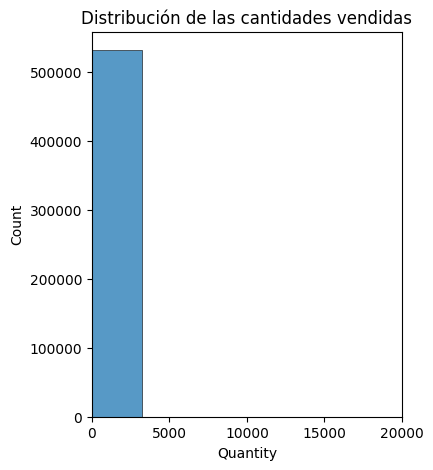

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (4,5))
sns.histplot(data = df["Quantity"], bins = 50)
plt.title("Distribución de las cantidades vendidas")
plt.xlim(0,20000)

El gráfico muestra que la gran mayoría de las transacciones (más del 80%, considerando que el total es 541,909) tienen cantidades vendidas (Quantity) en rangos bajos (entre 0 y 5,000 unidades).

(0.0, 40000.0)

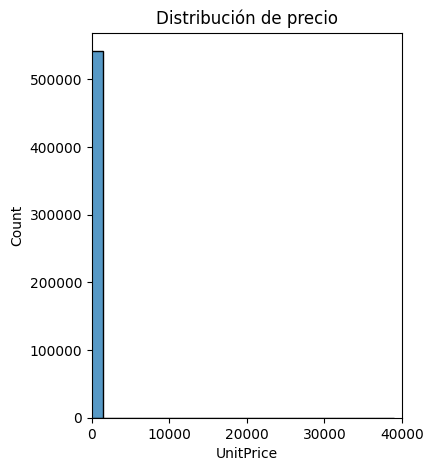

In [156]:
import seaborn as sns
import matplotlib.pyplot as plot

plt.figure(figsize = (4,5))
sns.histplot(data = df["UnitPrice"], bins = 20)
plt.title("Distribución de precio")
plt.xlim(0, 40000)

El gráfico muestra que la gran mayoría de los precios (más del 80%, considerando que el total es 541,909) tienen precio en rangos bajos (entre 0 y 10).

**Correlacion**

<Axes: >

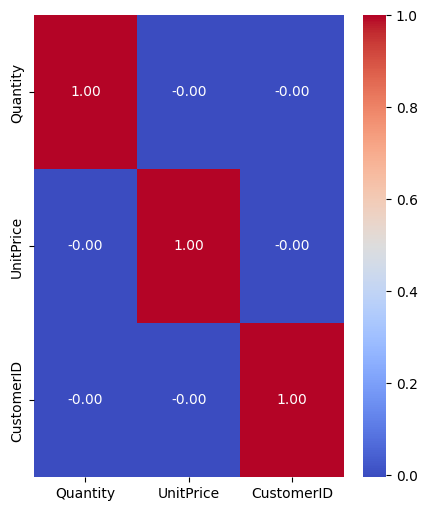

In [157]:
num_cols = df.select_dtypes(include = "number")

corr_matrix = num_cols.corr()

plt.figure(figsize = (5,6))
sns.heatmap(corr_matrix , annot=True , cmap='coolwarm', fmt=".2f")

A su vez, se identificó valores negativos en cantidades y precios. Sería interesante analizarlos.

In [158]:
print(df[df["Quantity"]< 0].head(30))
print("Valores negativos",len(df[df["Quantity"]< 0]))
print("Valores negativos",len(df[df["Quantity"]< 0]) / len(df) * 100)

     InvoiceNo StockCode                          Description  Quantity  \
141    C536379         D                             Discount        -1   
154    C536383    35004C      SET OF 3 COLOURED  FLYING DUCKS        -1   
235    C536391     22556       PLASTERS IN TIN CIRCUS PARADE        -12   
236    C536391     21984     PACK OF 12 PINK PAISLEY TISSUES        -24   
237    C536391     21983     PACK OF 12 BLUE PAISLEY TISSUES        -24   
238    C536391     21980    PACK OF 12 RED RETROSPOT TISSUES        -24   
239    C536391     21484          CHICK GREY HOT WATER BOTTLE       -12   
240    C536391     22557     PLASTERS IN TIN VINTAGE PAISLEY        -12   
241    C536391     22553               PLASTERS IN TIN SKULLS       -24   
939    C536506     22960             JAM MAKING SET WITH JARS        -6   
1441   C536543     22632            HAND WARMER RED RETROSPOT        -1   
1442   C536543     22355            CHARLOTTE BAG SUKI DESIGN        -2   
1973   C536548     22244 

Se puede ver que la mayoría corresponden a la misma fecha, seguramente sean devoluciones y para un solo caso, es un descuento

In [159]:
print(df[df["UnitPrice"]< 0].head(30))
print("Valores negativos",len(df[df["UnitPrice"]< 0]))
print("Valores negativos",len(df[df["UnitPrice"]< 0]) / len(df) * 100)

       InvoiceNo StockCode      Description  Quantity      InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  8/12/2011 14:51   
299984   A563187         B  Adjust bad debt         1  8/12/2011 14:52   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom  
Valores negativos 2
Valores negativos 0.0003690656549346846


Son solo 2 valores, se tratan de ajustes de deuda como dice ahí la descripción.

**Veamos la asimetría y la curtosis:**

In [160]:
print("Asimetría:", num_cols.skew())

Asimetría: Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
dtype: float64


Tenemos una asimetría alta en los precios, de un valor de 186.

In [161]:
print("Curtosis:" , num_cols.kurt())

Curtosis: Quantity      119769.160031
UnitPrice      59005.719097
CustomerID        -1.179982
dtype: float64


Curtosis muy elevadas!

# **Data wrangling**

**Nulos**

In [162]:
df.isnull().sum() / len(df)

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.002683
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,0.249267
Country,0.000000


Los registros sin CustomerID no pueden ser asignados a un cliente, así que no sirven para segmentar.

In [163]:
df_sinnulos = df.dropna(subset = "CustomerID")
df_sinnulos['CustomerID'] = df_sinnulos['CustomerID'].astype(int)

In [164]:
df_sinnulos.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


**Duplicados**

In [165]:
df_sinnulos[df_sinnulos.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446,United Kingdom


No son duplicados reales

**Outliers**

In [166]:
Q1 = df_sinnulos[['Quantity', 'UnitPrice']].quantile(0.25)
Q3 = df_sinnulos[['Quantity', 'UnitPrice']].quantile(0.75)
IQR = Q3 - Q1

# Filtramos
df_limpia = df_sinnulos[~((df_sinnulos[['Quantity', 'UnitPrice']] < (Q1 - 1.5 * IQR)) | (df_sinnulos[['Quantity', 'UnitPrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]

**Transformación por asimetría**: Como habíamos visto, tenemos grandes asimetrías en las variables quantity y precio."

Primero filtramos los valores negativos que teníamos en algunas variables.

In [167]:
df_limpia = df_limpia[(df_limpia['Quantity'] > 0) & (df_limpia['UnitPrice'] > 0)]

Aplicamos una transformación logarítmica para corregir la asimetría.

In [168]:
import numpy as np
df_limpia['Quantity_log'] = np.log1p(df_limpia['Quantity'])
df_limpia['UnitPrice_log'] = np.log1p(df_limpia['UnitPrice'])

# **Feature Egineering**:

Necesitamos crear las variables para el modelo RFM.

*Recency (Recencia)*

In [169]:
df_limpia["InvoiceDate"] = pd.to_datetime(df_limpia["InvoiceDate"]) #Aseguramos el formato de la fecha
max_date = df_limpia["InvoiceDate"].max() #Buscamos la fecha máxima del data set para calcular luego la última fecha del cliente

In [170]:
recency = df_limpia.groupby("CustomerID")["InvoiceDate"].max().reset_index() #Buscamos la última fecha de compra de cada cliente

In [171]:
recency["Recency"] = (max_date - recency["InvoiceDate"]).dt.days


In [172]:
recency #Aca tenemos la última vez que compró cada cliente.

,CustomerID,InvoiceDate,Recency
0,12347,2011-12-07 15:52:00,1
1,12348,2011-04-05 10:47:00,248
2,12349,2011-11-21 09:51:00,18
3,12350,2011-02-02 16:01:00,309
4,12352,2011-11-03 14:37:00,35
...,...,...,...
4186,18280,2011-03-07 09:52:00,277
4187,18281,2011-06-12 10:53:00,180
4188,18282,2011-12-02 11:43:00,7
4189,18283,2011-12-06 12:02:00,3


*Frequency (Frecuencia)*

In [173]:
frequency = df_limpia.groupby("CustomerID")["InvoiceNo"].nunique().reset_index() #Cuento valores únicos de cada factura para obtener la cantidad de veces que compro un cliente
frequency.columns = ['CustomerID', 'Frequency']

In [174]:
frequency

,CustomerID,Frequency
0,12347,7
1,12348,3
2,12349,1
3,12350,1
4,12352,7
...,...,...
4186,18280,1
4187,18281,1
4188,18282,2
4189,18283,16


*Monetary (Monto gastado)*

In [175]:
df_limpia["Monto"] = df_limpia["Quantity"] * df_limpia["UnitPrice"]

In [176]:
monetary = df_limpia.groupby("CustomerID")["Monto"].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

In [177]:
monetary

,CustomerID,Monetary
0,12347,3314.73
1,12348,90.20
2,12349,999.15
3,12350,294.40
4,12352,1130.94
...,...,...
4186,18280,137.00
4187,18281,46.92
4188,18282,113.13
4189,18283,2051.98


Una vez creadas las 3 variables, necesitamos consolidarlas en un mismo dataframe (DF) para posteriormente poder construir el modelo.

In [178]:
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

In [179]:
rfm

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12347,2011-12-07 15:52:00,1,7,3314.73
1,12348,2011-04-05 10:47:00,248,3,90.20
2,12349,2011-11-21 09:51:00,18,1,999.15
3,12350,2011-02-02 16:01:00,309,1,294.40
4,12352,2011-11-03 14:37:00,35,7,1130.94
...,...,...,...,...,...
4186,18280,2011-03-07 09:52:00,277,1,137.00
4187,18281,2011-06-12 10:53:00,180,1,46.92
4188,18282,2011-12-02 11:43:00,7,2,113.13
4189,18283,2011-12-06 12:02:00,3,16,2051.98


Vamos a normalizar los datos porque tenemos valores en distintas escalas: 'Invoice' presenta valores mucho menores que las otras dos variables.

In [180]:
from sklearn.preprocessing import StandardScaler

rfm_features = ['Recency', 'Frequency', 'Monetary']

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[rfm_features])

In [181]:
rfm_scaled

array([[-0.90586814,  0.42552448,  1.03578802],
       [ 1.56668705, -0.14465315, -0.42638631],
       [-0.73569228, -0.42974197, -0.01421977],
       ...,
       [-0.84580607, -0.28719756, -0.41598862],
       [-0.88584745,  1.70842415,  0.46318965],
       [-0.495444  , -0.14465315, -0.03162785]])

**Una vez que contamos con las variables de interés (Frecuencia, Recencia y Monetario) normalizadas, podemos aplicar un modelo de K-means para agrupar a nuestros clientes.**

# **Modelado:**

Debemos elegir el número óptimo de clusters (k). Para esto, utilizaremos el método del codo.

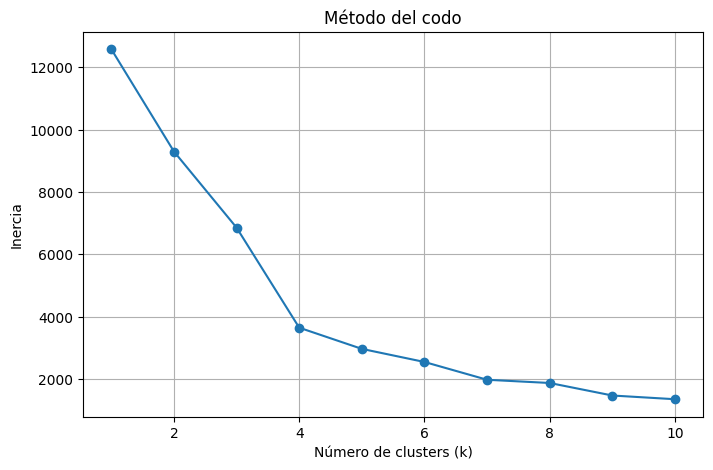

In [183]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = [] #Creamos una lista para almacenar los valores de inercia que van a ser creado cuando apliquemos el modelo a nuestros datos, es decir obtendremos un parámetros: .inertia_

# Probamos k de 1 a 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42) #Creamos el modelo K-Means con k clusters
    kmeans.fit(rfm_scaled)  #Ajustar el modelo a los datos normalizados (rfm_scaled)
    inertia.append(kmeans.inertia_) #Guardar la inercia que se calculó en el modelo, en la lista ; asi luego la usamos en el grafico. En scikit learn, los parámetros calculados usan el guión al final kmeans.inertia_

# Graficamos
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.grid(True)
plt.show()

Podemos ver que el codo se genera con un número de clusters = 4.

**Aplicamos el modelo**: K-means, con un número de clusters = 4.

In [184]:
from sklearn.metrics import silhouette_score

# Usamos el valor de k que elegiste antes
k_optimo = 4

kmeans = KMeans(n_clusters=k_optimo, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [191]:
rfm

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,Cluster
0,12347,2011-12-07 15:52:00,1,7,3314.73,0
1,12348,2011-04-05 10:47:00,248,3,90.20,3
2,12349,2011-11-21 09:51:00,18,1,999.15,0
3,12350,2011-02-02 16:01:00,309,1,294.40,3
4,12352,2011-11-03 14:37:00,35,7,1130.94,0
...,...,...,...,...,...,...
4186,18280,2011-03-07 09:52:00,277,1,137.00,3
4187,18281,2011-06-12 10:53:00,180,1,46.92,3
4188,18282,2011-12-02 11:43:00,7,2,113.13,0
4189,18283,2011-12-06 12:02:00,3,16,2051.98,2


**Evaluamos el modelo:**

In [185]:
# Calculamos el coeficiente
score = silhouette_score(rfm_scaled, rfm['Cluster']) #Donde en el primer término ponemos nuestros datos normalizados, y en el segundo los clusters generados por el modelo K-means.
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.581


El valor = 0.581 indica que los clusters están bien formados, con una separación clara y coherente entre ellos, especialmente considerando que este es un dataset real con ruido. Esta conclusión se obtiene según el criterio general de que un valor entre 0.5 y 0.7 indica una buena separación.



**Interpretacion de resultados:**

Agrupamos por clusters

In [188]:
rfm.groupby("Cluster")[["Recency","Frequency", "Monetary"]].mean().round(1).sort_values("Monetary", ascending = False)

,Recency,Frequency,Monetary
Cluster,,,
1,1.0,148.0,43780.4
2,12.4,18.4,5342.5
0,42.8,3.4,841.9
3,245.8,1.5,310.3


**Conclusiones**: Tenemos 4 tipos de cluster con diferencias marcadas.



1.   Cluster 1 = Este grupo genera grandes ganancias monetarias para la empresa, ya sea porque realiza muchas compras (niveles altos de frecuencia), compra productos con un precio más elevado, o realiza pedidos en grandes volúmenes de nuestros productos (mayoristas). Es decir, pueden ser clientes con alto poder adquisitivo o empresas que manejan una alta necesidad de productos. En conclusión, son clientes muy importantes para la empresa; es interesante focalizar las estrategias en este grupo.
2.   Cluster 3: En este grupo se pueden visualizar valores bajos en las variables monetarias y de frecuencia. Además, no compraron recientemente. Quizá son clientes que se perdieron o están dormidos.
3.   Cluster 0: Seguramente son clientes ocasionales, compran cada tanto, posiblemente por necesidad puntual o para probar el producto.
4.   Cluster 2: Probablemente son clientes fijos de la organización, ya que adquirieron productos recientemente y compran seguido (alta frecuencia). Sin embargo, son clientes que manejan volúmenes de compra o un poder adquisitivo más bajo. Seguramente son minoristas o clientes particulares.







**Veamos la cantidad de clientes que tenemos en un gráfico**:


In [192]:
rfm

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,Cluster
0,12347,2011-12-07 15:52:00,1,7,3314.73,0
1,12348,2011-04-05 10:47:00,248,3,90.20,3
2,12349,2011-11-21 09:51:00,18,1,999.15,0
3,12350,2011-02-02 16:01:00,309,1,294.40,3
4,12352,2011-11-03 14:37:00,35,7,1130.94,0
...,...,...,...,...,...,...
4186,18280,2011-03-07 09:52:00,277,1,137.00,3
4187,18281,2011-06-12 10:53:00,180,1,46.92,3
4188,18282,2011-12-02 11:43:00,7,2,113.13,0
4189,18283,2011-12-06 12:02:00,3,16,2051.98,2


In [198]:
counts = rfm["Cluster"].value_counts().sort_index() #generamos un df con la cantidad de clientes por cada cluster y ordenamos el índice por el número de cluster.

Text(0.5, 1.0, 'Distribución de clientes')

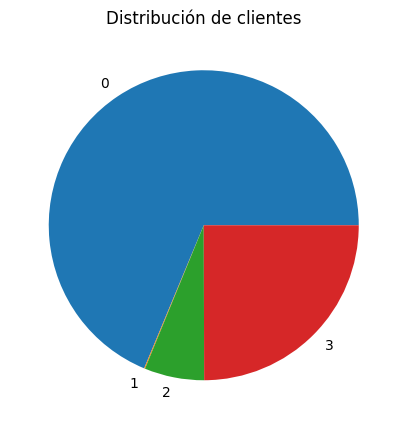

In [199]:
plt.figure(figsize = (5,7))
plt.pie(counts, labels=counts.index)
plt.title("Distribución de clientes")


**Conclusiones en función de la cantidad de clientes:**

1.   El clúster 1: Aunque lo identificamos como el más importante por su valor, representa una porción muy pequeña de nuestra base de clientes.
2.   Clúster 0: Constituye el grupo más numeroso, compuesto por clientes ocasionales que realizan compras puntuales. Este segmento representa la mayor parte de nuestro volumen de negocio.
3.   Clúster 3: Corresponde a un grupo significativo de clientes inactivos o perdidos, con un tamaño considerable en términos numéricos.
2.   Clúster 2: Formado por clientes fieles pero de bajo gasto. Específicamente en este negocio, este grupo no es muy numeroso.



